# 2.1 Анализ номинативных данных

In [2]:
df <- read.csv("https://stepik.org/media/attachments/lesson/11502/grants.csv")

In [3]:
str(df)

'data.frame':	1420 obs. of  7 variables:
 $ npersons    : int  2 1 1 1 4 2 1 2 1 2 ...
 $ years_in_uni: Factor w/ 3 levels "< 5","> 10","5-10": 1 1 1 3 2 1 1 3 1 1 ...
 $ oldest_age  : int  66 51 36 46 46 46 36 45 35 51 ...
 $ field       : Factor w/ 5 levels "beh_cog","bio",..: 2 2 2 2 4 2 3 2 1 2 ...
 $ RFCD.Code.1 : int  270799 270106 270708 270603 240402 270603 250103 270603 380107 270203 ...
 $ midpoint    : num  25000 25000 25000 25000 25000 ...
 $ status      : int  1 0 0 0 1 0 1 1 1 1 ...


In [4]:
df$status <- as.factor(df$status)
levels(df$status) <- c("Not funded", "Funded")

In [5]:
df$status <- factor(df$status, labels = c("Not funded", "Funded"))

In [6]:
# 1d Table 
t1 <- table(df$status)
t1


Not funded     Funded 
       747        673 

In [7]:
dim(t1)

[1] 2

In [8]:
# 2d Table
t2 <- table(df$status, df$field)
t2

            
             beh_cog bio chem physics soc
  Not funded     100 473   60      70  44
  Funded          65 432   66      78  32

In [9]:
t2 <- table(status = df$status, field = df$field)

In [10]:
dim(t2)

[1] 2 5

In [11]:
prop.table(t2)

prop.table(t2, 1)
prop.table(t2, 2)


            field
status          beh_cog        bio       chem    physics        soc
  Not funded 0.07042254 0.33309859 0.04225352 0.04929577 0.03098592
  Funded     0.04577465 0.30422535 0.04647887 0.05492958 0.02253521

            field
status          beh_cog        bio       chem    physics        soc
  Not funded 0.13386881 0.63319946 0.08032129 0.09370817 0.05890228
  Funded     0.09658247 0.64190193 0.09806835 0.11589896 0.04754829

            field
status         beh_cog       bio      chem   physics       soc
  Not funded 0.6060606 0.5226519 0.4761905 0.4729730 0.5789474
  Funded     0.3939394 0.4773481 0.5238095 0.5270270 0.4210526

In [12]:
# 3d Table
t3 <- table(Years = df$years_in_uni, Field = df$field, Status = df$status)
t3

, , Status = Not funded

      Field
Years  beh_cog bio chem physics soc
  < 5       57 198   31      20  22
  > 10      29 144   28      47  16
  5-10      14 131    1       3   6

, , Status = Funded

      Field
Years  beh_cog bio chem physics soc
  < 5       27 180   41      22  14
  > 10      30 155   19      54  15
  5-10       8  97    6       2   3


In [13]:
dim(t3)

[1] 3 5 2

К частям таблицы можно обращаться так же, как и к матрицам. 

HairEyeColor - таблица с данными, встроенными в R. Посмотрите на неё в R. Команда dimnames(HairEyeColor) позволит нам посмотреть, какие измерения есть в этой таблице и как они называются. Например, чтобы обратиться к части таблицы, в которой хранятся данные только о мужчинах, нам нужно выполнить следующую команду: 

HairEyeColor[ , ,'Male']

Ваша задача в переменную red_men сохранить долю рыжеволосых (Red) от общего числа голубоглазых мужчин.

Обратите внимание, что нужны не проценты, а просто доля, то есть десятичная дробь  (например, не 10%, а 0.1).



In [21]:
HairEyeColor

, , Sex = Male

       Eye
Hair    Brown Blue Hazel Green
  Black    32   11    10     3
  Brown    53   50    25    15
  Red      10   10     7     7
  Blond     3   30     5     8

, , Sex = Female

       Eye
Hair    Brown Blue Hazel Green
  Black    36    9     5     2
  Brown    66   34    29    14
  Red      16    7     7     7
  Blond     4   64     5     8


In [22]:
dimnames(HairEyeColor)

$Hair
[1] "Black" "Brown" "Red"   "Blond"

$Eye
[1] "Brown" "Blue"  "Hazel" "Green"

$Sex
[1] "Male"   "Female"

In [37]:
prop.table(HairEyeColor[,"Blue",'Male'])[3]

Red 
0.0990099

Напишите число зеленоглазых женщин в наборе данных HairEyeColor.

In [39]:
sum(HairEyeColor[,"Green",'Female'])

[1] 31

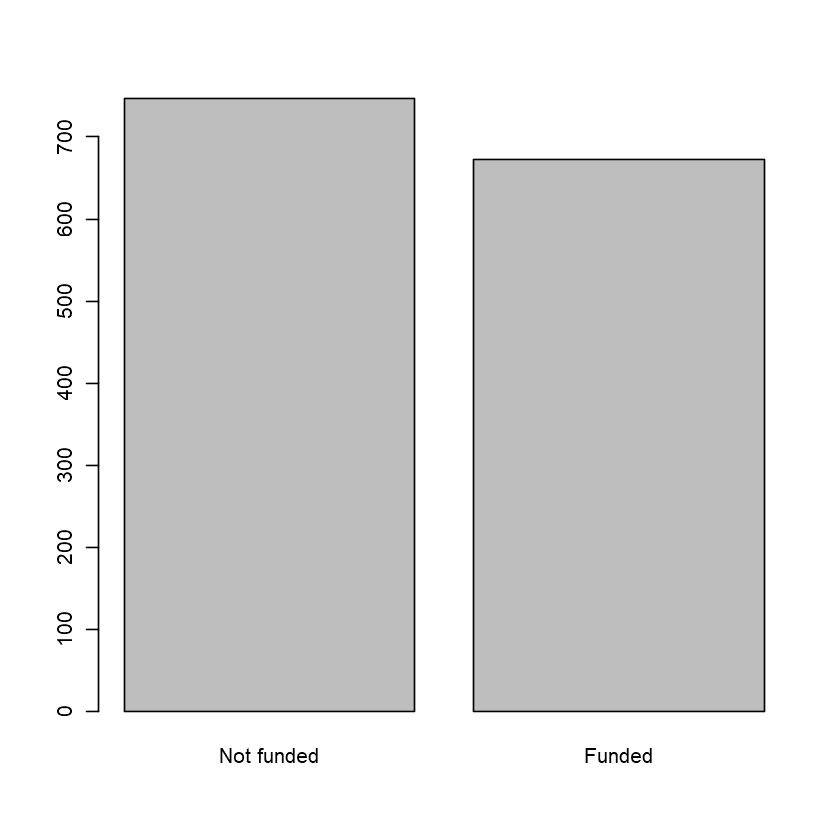

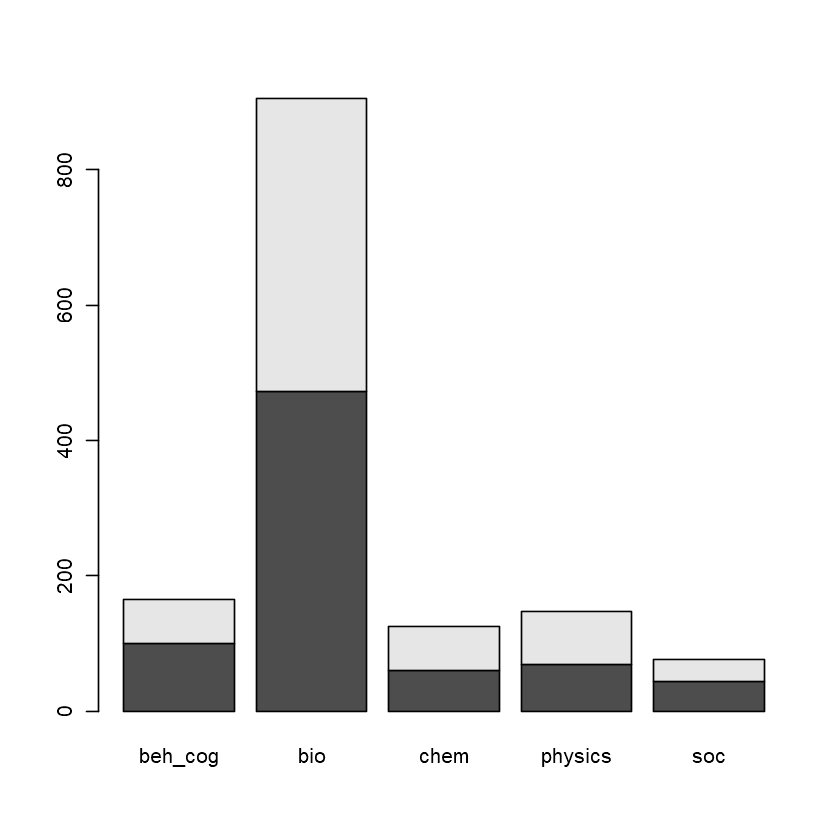

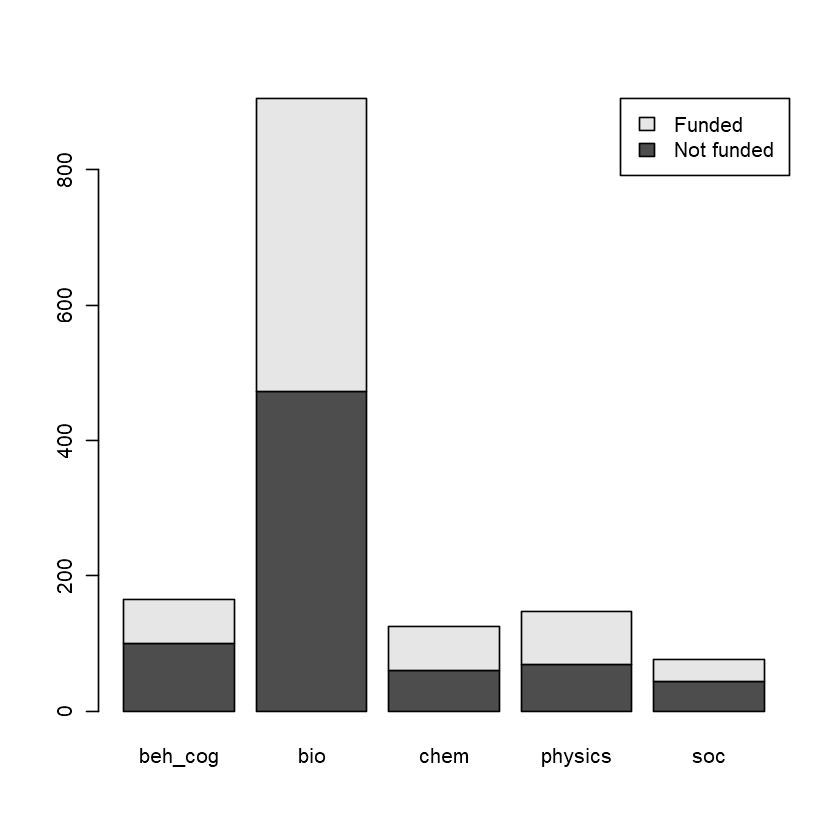

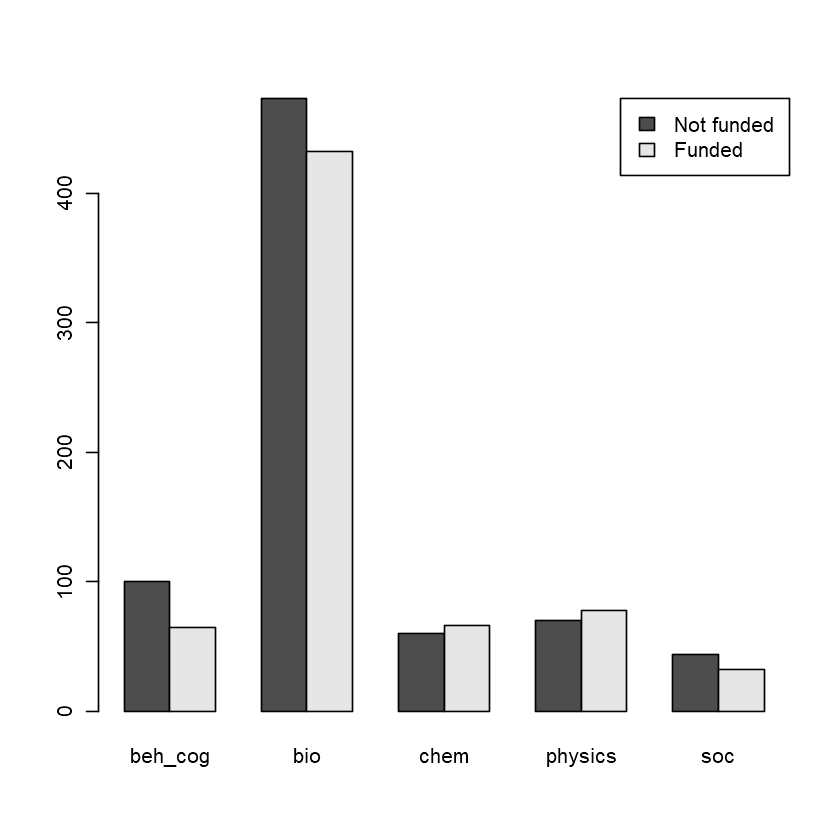

In [14]:
# plots

barplot(t1)
barplot(t2)
barplot(t2, legend.text = TRUE, args.legend = list(x = "topright"))
barplot(t2, legend.text = TRUE, args.legend = list(x = "topright"), beside = TRUE)


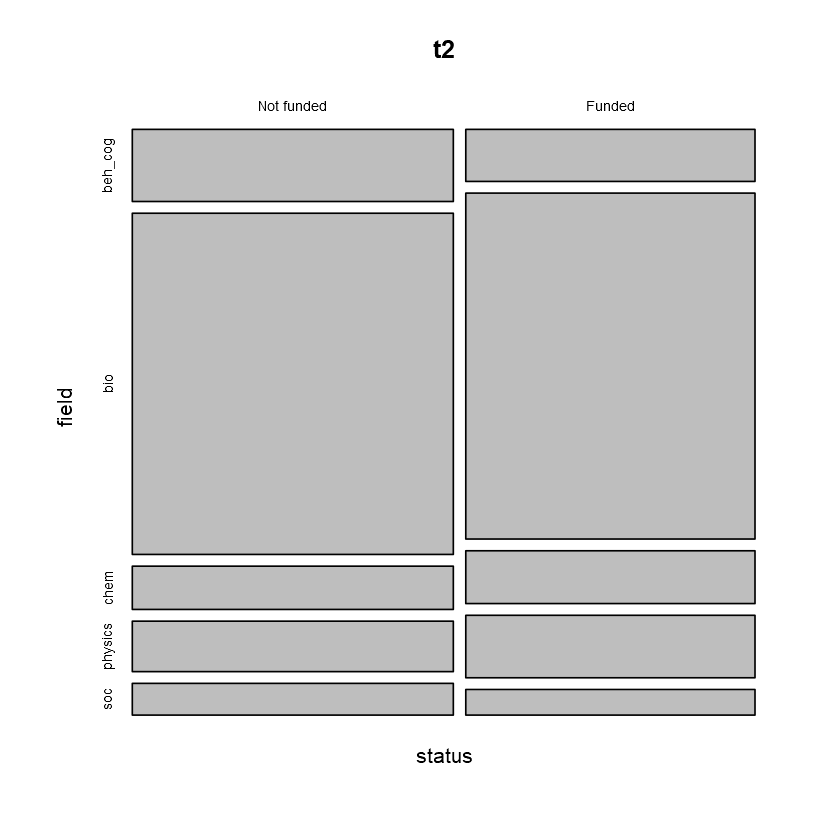

In [15]:
mosaicplot(t2)


Постройте столбчатую диаграмму распределения цвета глаз по цвету волос только у женщин из 
таблицы HairEyeColor. По оси X должен идти цвет волос, цвет столбиков должен отражать цвет глаз. По оси Y - количество наблюдений.

Чтобы построить столбчатую диаграмму в ggplot, вам нужно подключить нужный пакет, затем преобразовать таблицу HairEyeColor в data frame:
```r
mydata <- as.data.frame(HairEyeColor)
```
Постройте график на основе предложенного кода, сохранив его в переменную obj. 
Укажите, чему равен аргумент data, что должно находиться в aes(). Изучите справку по geom_bar(), чтобы узнать, чему должен равняться аргумент position для отображения цвета глаз в виде соседних столбиков, также вам может быть полезна эта памятка. Там же вы найдёте ответ на вопрос, за что отвечает аргумент stat. С помощью scale_fill_manual мы говорим графику, что мы хотим, чтобы он использовал указанные нами цвета.
Дополните предложенный код:
```r
library("ggplot2")
mydata <- as.data.frame(HairEyeColor)
obj <- ggplot(data = , aes(x = , y = Freq)) + 
        geom_bar(stat="identity", position = ) + 
        scale_fill_manual(values=c("Brown", "Blue", "Darkgrey", "Darkgreen"))
```
У себя на компьютере вы можете визуализировать полученный график, исполнив 'obj'. В случае, если все сделано правильно, он будет выглядеть так (обратите внимание на название осей и легенды):

Прежде чем отправить код на проверку, выполните его на своем компьютере, чтобы избежать лишних ошибок.
При ошибке, обратите внимание на содержание feedback.

In [69]:
library("ggplot2")
mydata <- as.data.frame(HairEyeColor)
obj <- ggplot(data = subset(mydata, Sex == 'Female'), 
              aes(x = Hair , y = Freq, fill = Eye) ) + 
        geom_bar(stat="identity", position =position_dodge() ) + 
        scale_fill_manual(values=c("Brown", "Blue", "Darkgrey", "Darkgreen"))

ERROR: Error in eval(e, x, parent.frame()): объект 'sex' не найден


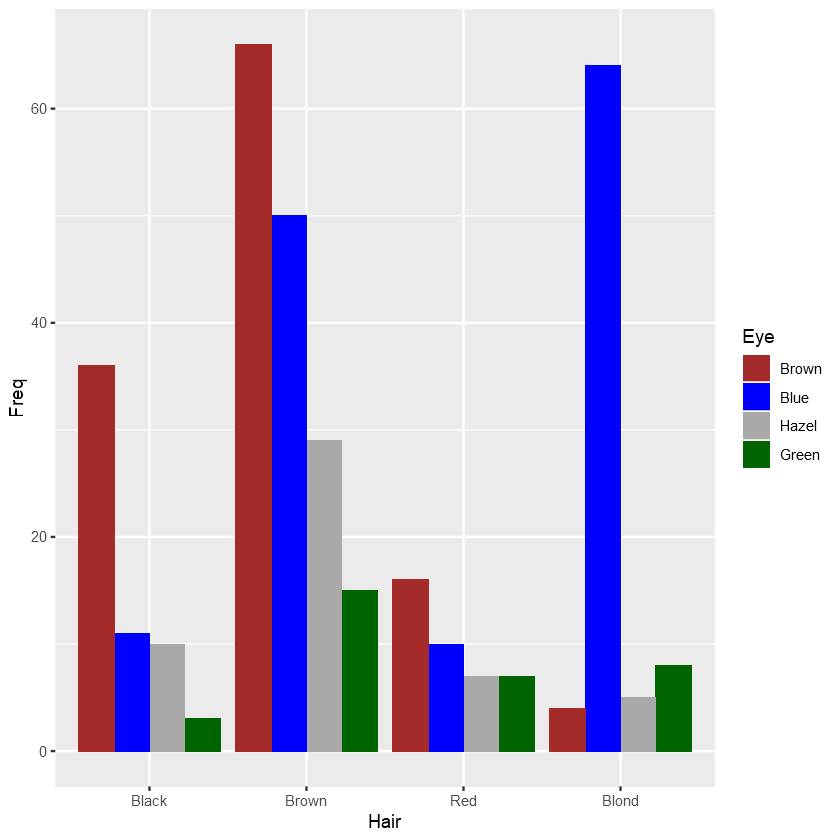

In [70]:
obj

In [16]:
##########################

# Binomial Test
binom.test(x = 5, n = 20, p = 0.5)
binom.test(t1)


	Exact binomial test

data:  5 and 20
number of successes = 5, number of trials = 20, p-value = 0.04139
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.08657147 0.49104587
sample estimates:
probability of success 
                  0.25 



	Exact binomial test

data:  t1
number of successes = 747, number of trials = 1420, p-value = 0.05268
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.4997023 0.5523023
sample estimates:
probability of success 
             0.5260563 


In [71]:
# Chi-Square
t1
chisq.test(t1)


Not funded     Funded 
       747        673 


	Chi-squared test for given probabilities

data:  t1
X-squared = 3.8563, df = 1, p-value = 0.04956


In [18]:
chi <- chisq.test(t1)
chi$exp
chi$obs

Not funded     Funded 
       710        710


Not funded     Funded 
       747        673 

In [19]:
t2
chisq.test(t2)

            field
status       beh_cog bio chem physics soc
  Not funded     100 473   60      70  44
  Funded          65 432   66      78  32


	Pearson's Chi-squared test

data:  t2
X-squared = 8.0601, df = 4, p-value = 0.0894


In [20]:
# Fisher's Exact Test

fisher.test(t2)


	Fisher's Exact Test for Count Data

data:  t2
p-value = 0.08921
alternative hypothesis: two.sided


In [73]:
df  <- as.data.frame(HairEyeColor) 

In [87]:
chisq.test(HairEyeColor["Brown",,"Female"])


	Chi-squared test for given probabilities

data:  HairEyeColor["Brown", , "Female"]
X-squared = 40.189, df = 3, p-value = 9.717e-09


In [86]:
str(HairEyeColor)

 'table' num [1:4, 1:4, 1:2] 32 53 10 3 11 50 10 30 10 25 ...
 - attr(*, "dimnames")=List of 3
  ..$ Hair: chr [1:4] "Black" "Brown" "Red" "Blond"
  ..$ Eye : chr [1:4] "Brown" "Blue" "Hazel" "Green"
  ..$ Sex : chr [1:2] "Male" "Female"


In [89]:
library(ggplot2)

In [99]:
as.numeric(chisq.test(x = diamonds$cut,y = diamonds$color)[1])

[1] 310.3179

Опять воспользуемся данными diamonds из библиотеки ggplot2. При помощи критерия Хи - квадрат проверьте гипотезу о взаимосвязи цены (price) и каратов (carat) бриллиантов. Для этого сначала нужно перевести эти количественные переменные в формат пригодный для Хи - квадрат. Создайте две новые переменные в данных diamonds:

factor_price - где будет 1, если значение цены больше либо равно чем среднее, и 0, если значение цены ниже среднего цены по выборке.

factor_carat - где будет 1, если число карат больше либо равно чем среднее,  и 0, если ниже среднего числа карат по выборке.

Важный момент - на больших данных цикл for() работает довольно медленно, постарайтесь решить эту задачу без его использования!

Используя эти шкалы при помощи Хи - квадрат проверьте исходную гипотезу. Сохраните в переменную main_stat значение критерия  Хи - квадрат.

Пример перевода количественной шкалы в номинативную:

```r
x <- (1, 2, 3, 5, 6, 7) # mean(x) = 4
factor_x <- (0, 0, 0, 1, 1, 1)
```

In [19]:
library(ggplot2)
t1 <- data.frame(diamonds)
factor_price <- ifelse(t1$price >= mean(t1$price),1,0)
factor_carat <- ifelse(t1$carat >= mean(t1$carat),1,0)
a <- table(factor_price,factor_carat)
main_stat  <- as.numeric(chisq.test(a)[1])

In [20]:
main_stat

[1] 40735.22

При помощи точного критерия Фишера проверьте гипотезу о взаимосвязи типа коробки передач (am) и типа двигателя (vs) в данных mtcars. Результат выполнения критерия сохраните в переменную.Получившийся p - уровень значимости сохраните в переменную fisher_test.

In [25]:
fisher_test <- as.numeric(fisher.test(x = mtcars$am, y = mtcars$vs)[1])

# 2.2 Сравнение двух групп

In [26]:
?iris
df  <- iris

In [27]:
str(df)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [28]:
df1  <- subset(df, Species != "setosa")
str(df1)

'data.frame':	100 obs. of  5 variables:
 $ Sepal.Length: num  7 6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 ...
 $ Sepal.Width : num  3.2 3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 ...
 $ Petal.Length: num  4.7 4.5 4.9 4 4.6 4.5 4.7 3.3 4.6 3.9 ...
 $ Petal.Width : num  1.4 1.5 1.5 1.3 1.5 1.3 1.6 1 1.3 1.4 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 2 2 2 2 2 2 2 2 2 2 ...


In [29]:
table(df1$Species)


    setosa versicolor  virginica 
         0         50         50 

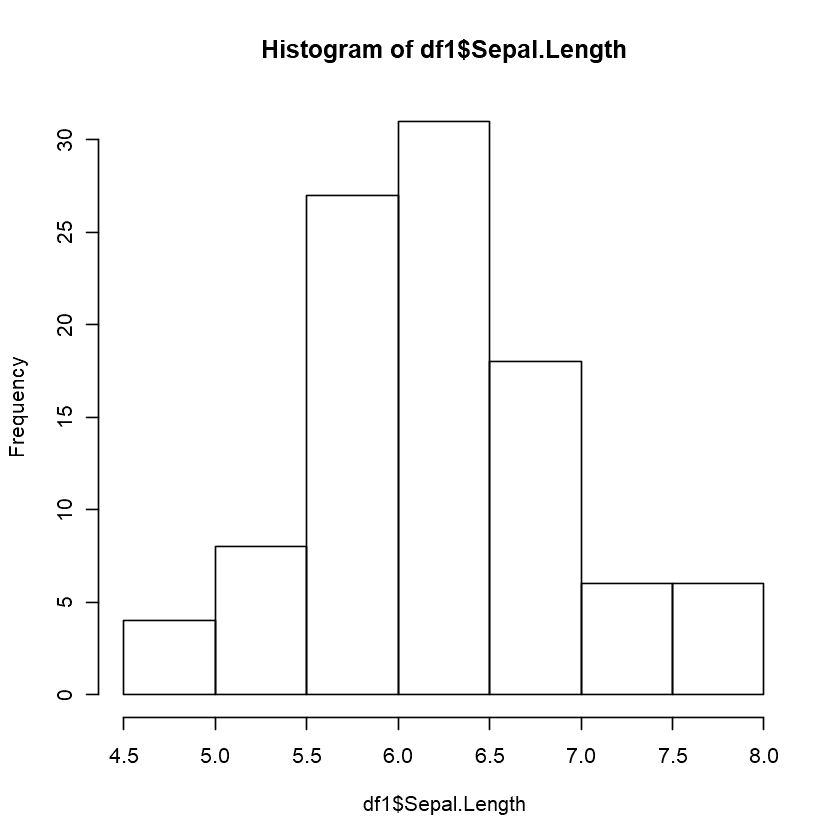

In [30]:
hist(df1$Sepal.Length)

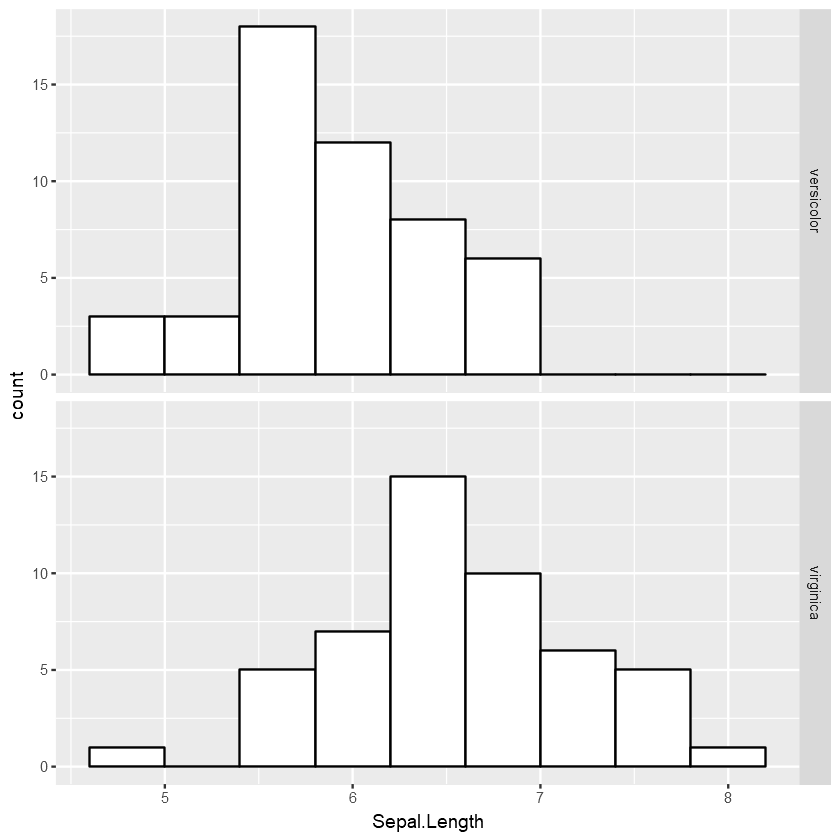

In [31]:
ggplot(df1, aes(x =Sepal.Length ))+
  geom_histogram(fill = "white", col = "black", binwidth = 0.4)+
  facet_grid(Species ~ .)

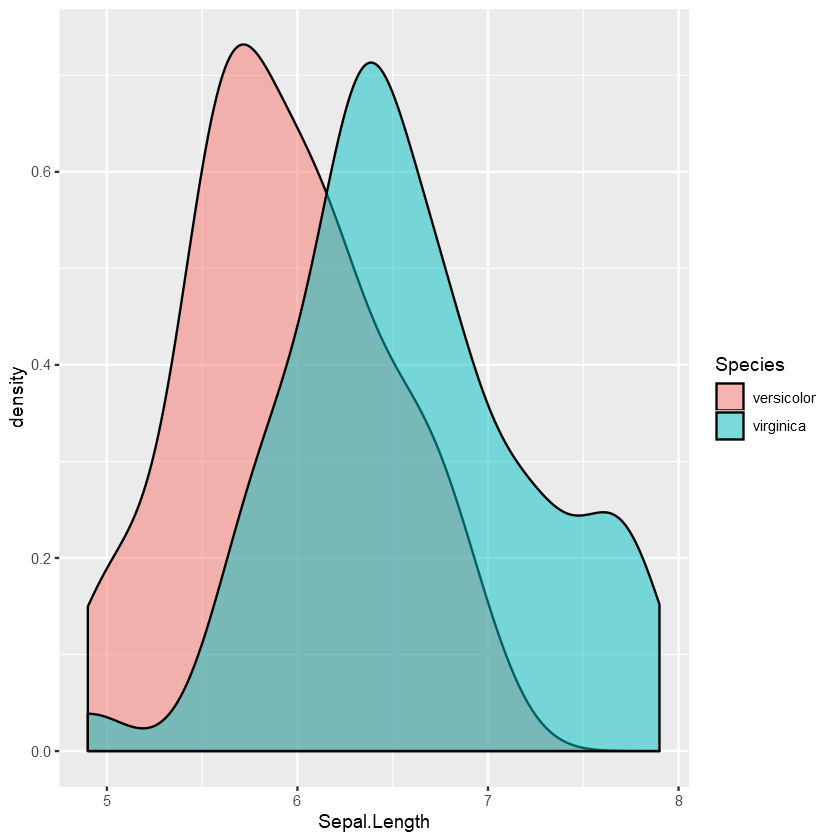

In [32]:
ggplot(df1, aes(Sepal.Length, fill = Species ))+
  geom_density(alpha = 0.5)


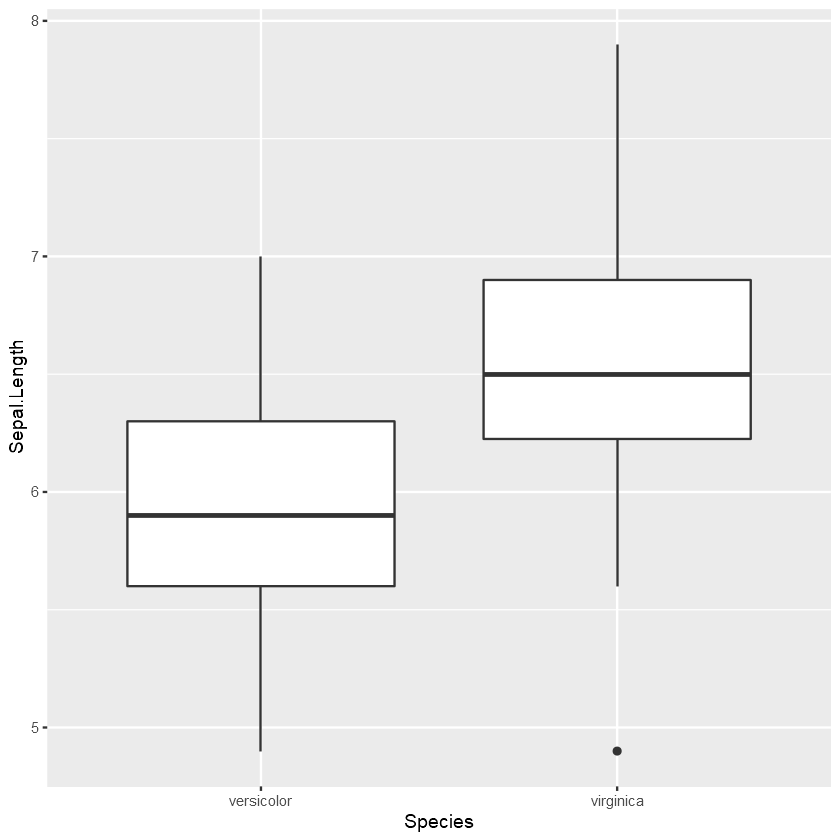

In [33]:
ggplot(df1, aes(Species, Sepal.Length))+
  geom_boxplot()

In [34]:
shapiro.test(df1$Sepal.Length)



	Shapiro-Wilk normality test

data:  df1$Sepal.Length
W = 0.98054, p-value = 0.1464


In [35]:
shapiro.test(df1$Sepal.Length[df1$Species == "versicolor"])


	Shapiro-Wilk normality test

data:  df1$Sepal.Length[df1$Species == "versicolor"]
W = 0.97784, p-value = 0.4647


In [36]:
shapiro.test(df1$Sepal.Length[df1$Species == "virginica"])



	Shapiro-Wilk normality test

data:  df1$Sepal.Length[df1$Species == "virginica"]
W = 0.97118, p-value = 0.2583


In [37]:
#The same result in one line
by(df1$Sepal.Length, INDICES = df1$Species, shapiro.test)


df1$Species: setosa
NULL
------------------------------------------------------------ 
df1$Species: versicolor

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.97784, p-value = 0.4647

------------------------------------------------------------ 
df1$Species: virginica

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.97118, p-value = 0.2583


In [38]:
bartlett.test(Sepal.Length  ~ Species, df1)



	Bartlett test of homogeneity of variances

data:  Sepal.Length by Species
Bartlett's K-squared = 2.0949, df = 1, p-value = 0.1478


In [39]:
t.test(Sepal.Length  ~ Species, df1)


	Welch Two Sample t-test

data:  Sepal.Length by Species
t = -5.6292, df = 94.025, p-value = 1.866e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8819731 -0.4220269
sample estimates:
mean in group versicolor  mean in group virginica 
                   5.936                    6.588 


In [40]:
test1  <- t.test(Sepal.Length  ~ Species, df1)


In [41]:
str(test1)


List of 9
 $ statistic  : Named num -5.63
  ..- attr(*, "names")= chr "t"
 $ parameter  : Named num 94
  ..- attr(*, "names")= chr "df"
 $ p.value    : num 1.87e-07
 $ conf.int   : num [1:2] -0.882 -0.422
  ..- attr(*, "conf.level")= num 0.95
 $ estimate   : Named num [1:2] 5.94 6.59
  ..- attr(*, "names")= chr [1:2] "mean in group versicolor" "mean in group virginica"
 $ null.value : Named num 0
  ..- attr(*, "names")= chr "difference in means"
 $ alternative: chr "two.sided"
 $ method     : chr "Welch Two Sample t-test"
 $ data.name  : chr "Sepal.Length by Species"
 - attr(*, "class")= chr "htest"


In [42]:
test1$p.value


[1] 1.866144e-07

In [43]:
t.test(Sepal.Length  ~ Species, df1, var.equal = T)



	Two Sample t-test

data:  Sepal.Length by Species
t = -5.6292, df = 98, p-value = 1.725e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8818516 -0.4221484
sample estimates:
mean in group versicolor  mean in group virginica 
                   5.936                    6.588 


In [44]:
t.test(df1$Sepal.Length, mu = 8)



	One Sample t-test

data:  df1$Sepal.Length
t = -26.221, df = 99, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 8
95 percent confidence interval:
 6.130479 6.393521
sample estimates:
mean of x 
    6.262 


In [99]:
t.test(df1$Petal.Length, df1$Petal.Width, paired = T)


	Paired t-test

data:  df1$Petal.Length and df1$Petal.Width
t = 60.552, df = 99, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 3.124156 3.335844
sample estimates:
mean of the differences 
                   3.23 


In [120]:
#install.packages("Hmisc")

also installing the dependencies 'checkmate', 'Formula', 'latticeExtra', 'acepack', 'gridExtra', 'htmlTable', 'viridis'

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  не могу открыть URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"

package 'checkmate' successfully unpacked and MD5 sums checked
package 'Formula' successfully unpacked and MD5 sums checked
package 'latticeExtra' successfully unpacked and MD5 sums checked
package 'acepack' successfully unpacked and MD5 sums checked
package 'gridExtra' successfully unpacked and MD5 sums checked
package 'htmlTable' successfully unpacked and MD5 sums checked
package 'viridis' successfully unpacked and MD5 sums checked
package 'Hmisc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\max\AppData\Local\Temp\Rtmp4YkJkl\downloaded_packages


In [121]:
library(Hmisc)

Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, units



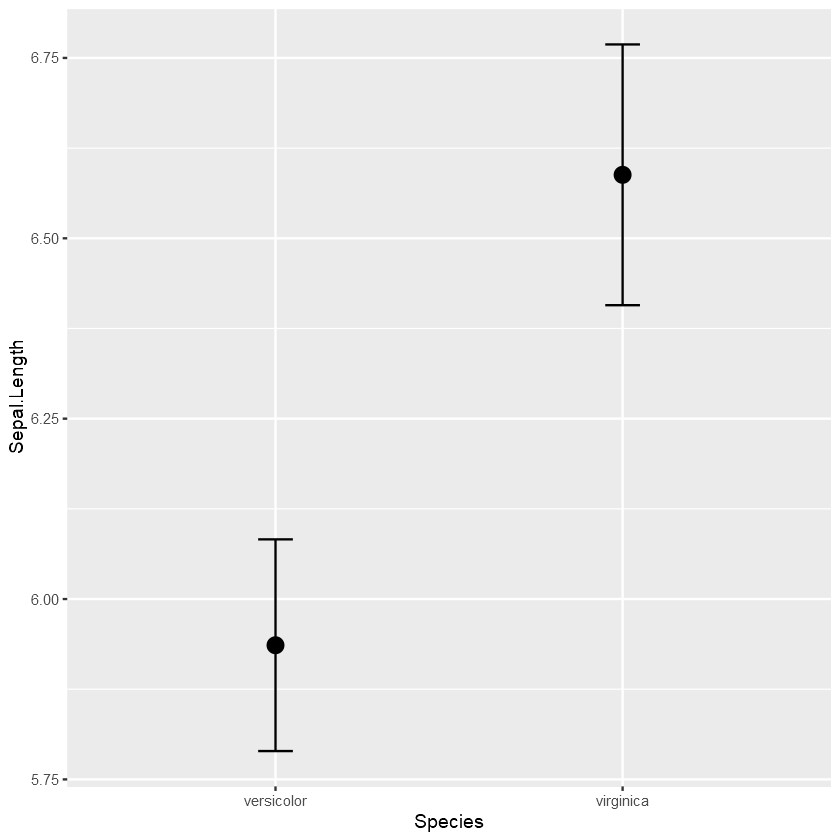

In [122]:

ggplot(df1, aes(Species, Sepal.Length))+
  stat_summary(fun.data = mean_cl_normal, geom = "errorbar", 
               width = 0.1)+
  stat_summary(fun.y = mean, geom = "point", size = 4)


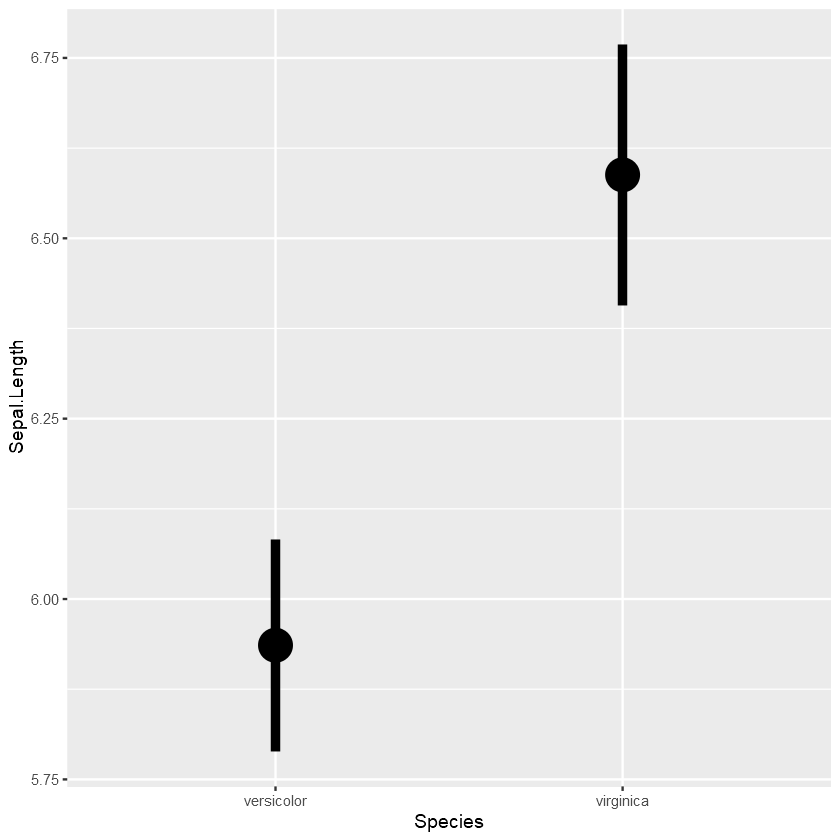

In [123]:
ggplot(df1, aes(Species, Sepal.Length))+
  stat_summary(fun.data = mean_cl_normal, geom = "pointrange", 
               size = 2)

In [48]:
?wilcox.test

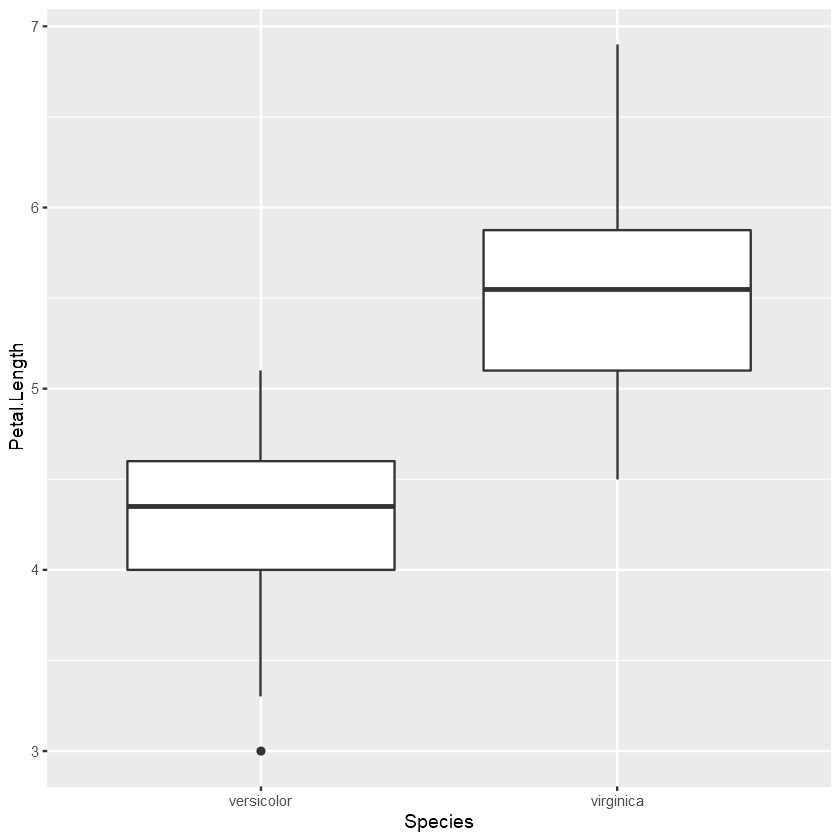

In [124]:
test2  <- wilcox.test(Petal.Length ~ Species, df1)
pv  <- test2$p.value

ggplot(df1, aes(Species, Petal.Length))+
  geom_boxplot()

In [50]:
wilcox.test(df1$Petal.Length, df1$Petal.Width, paired = T)


	Wilcoxon signed rank test with continuity correction

data:  df1$Petal.Length and df1$Petal.Width
V = 5050, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [51]:
paired_wtest  <- wilcox.test(df1$Petal.Length, df1$Petal.Width, paired = T)


In [52]:
paired_wtest$p.value

[1] 3.816638e-18

Памятка
t-Критерий Стьюдента для независимых выборок

```r
t.test(Var1 ~  Var2, data) # если первая переменная количественная, а вторая фактор
t.test(data $ Var1, data $ Var2) # если обе переменные количественные
```
 t-Критерий Стьюдента для зависимых выборок

```r
t.test(data $ Var1, data$Var2, paired = T)
```
Проверка на нормальность распределения
```r
shapiro.test(Var1) # проверка на нормальность распределения переменной Var1
# но не удобно когда есть группирующая факторная переменная
```
Поможет функция by(), которая применяет различные функции на каждом уровне фактора.  
```r
by(iris$Sepal.Length, INDICES = iris$Species, shapiro.test) # проверка на нормальность переменной 
# Sepal.Length в трех разных группах в соответствии с переменной Species
```

Проверка на гомогенность дисперсий
```r
bartlett.test(mpg ~ am, mtcars) #Критерий Бартлетта 
```

Задача про свинок!

Воспользуемся еще одним встроенным набором данных в R  - ToothGrowth. Данные позволяют исследовать рост зубов у морских свинок в зависимости от дозировки витамина C и типа потребляемых продуктов.

Сравните среднее значение длины зубов свинок, которые потребляли апельсиновый сок (OJ) с дозировкой 0.5 миллиграмм, со средним значением длины зубов свинок, которые потребляли аскорбиновую кислоту (VC) с дозировкой 2 миллиграмма. 

Значение t - критерия сохраните в переменную t_stat.



In [89]:
a <- subset(ToothGrowth, dose == 0.5 & supp == 'OJ' )['len'][,1]
b <- subset(ToothGrowth, dose == 2 & supp == 'VC' )['len'][,1]

In [103]:
t_stat <- as.numeric(t.test(x = a, y = b)[1])

$statistic
        t 
-6.232482

In [97]:
length(a)

[1] 10

In [98]:
length(b)

[1] 10

In [104]:
correct_data <- subset(ToothGrowth, supp=='OJ' & dose==0.5 | supp=='VC' & dose==2)    
t_stat <- t.test(len ~ supp, correct_data)$statistic

In [105]:
t_stat

t 
-6.232482

Скачайте данные, посвященные влиянию различного типа лечения на показатель артериального давления. 

https://stepic.org/media/attachments/lesson/11504/lekarstva.csv﻿

По всем испытуемым сравните показатель давления до начала лечения (Pressure_before) с показателем давления после лечения (Pressure_after) при помощи t - критерия для зависимых выборок. 

В поле для ответа укажите значение t - критерия.

(В качестве десятичного разделителя используйте запятую, например: 123,54)



In [108]:
df <- read.csv('https://stepic.org/media/attachments/lesson/11504/lekarstva.csv')
head(df)

Group,Uroven_sahara_v_krovi,Pressure_before,Pressure_after,Holesterin..Aprel.,Holesterin..Mart.
2,90,170,135,235,205
2,85,160,155,185,195
1,95,165,155,235,260
1,86,170,165,155,136
2,104,170,165,260,250
1,95,160,155,200,210


In [118]:
t.test(df$Pressure_before, df$Pressure_after, paired = T)[1]

$statistic
       t 
14.22673

В этом задании нужно проверить гипотезу о равенстве средних двух выборок, загрузив набор данных (нажмите начать решать задание) и выполнив все необходимые операции на вашем компьютере. В скачанных данных вы найдете две переменные: количественную переменную, и номинативную переменную с двумя градациями (которая разделяет наблюдения на две группы).

Для того чтобы без труда прочитать скачанные данные воспользуйтесь функцией:
```r
read.table("dataset_11504_11.txt")
# разумеется, у вас может быть другое название файла
# также убедитесь, что файл находится в рабочей директории
# или укажите полный путь к файлу
```
Сначала с помощью теста Бартлетта проверьте гомогенность дисперсий двух выборок. В случае, если дисперсии значимо не отличаются (с уровнем 0.05), примените тест Стьюдента, иначе - непараметрический тест (Манна-Уитни). В поле для ответа введите получившийся p-value, с точностью четыре знака после запятой.
Обратите внимание, что по умолчанию в t.test стоит var.equal = FALSE, так как мы будем применять его только в случае гомогенности дисперсий, измените значение этого параметра на  var.equal = TRUE.

Каждый раз вы будете скачивать новый набор данных.

Важно - в этом ответе используйте точку как десятичный разделитель!

Если p - value сильно меньше 0.05, например, 1.01e-07, в поле для ответа можете ввести 0

Сам код в поле для ответа вводить не надо, от вас ожидается только результат - одно число

Примеры ответа:

0.0424

0

0.9

In [29]:
foor <- function(data){
    if  (bartlett.test(V1 ~ V2, data)[3] > 0.05){
        return(t.test(data$V1 , data$V2, var.equal = T)[3])
    }else{
         return(wilcox.test(data$V1 ~ data$V2)[3])
    }
}

In [30]:
df <- read.table('3.txt')
foor(df)

$p.value
[1] 0.5192045

In [ ]:
df[1]

В этом задании также необходимо скачать данные на ваш компьютер.

В данных сохранены две количественные переменные, проверьте гипотезу о равенстве средних этих переменных при помощи t- теста для независимых выборок.

Если обнаружены значимые различия (p< 0.05), то введите через пробел три числа: среднее значение первой переменной, среднее значение второй переменной, p - уровень значимости. Например:

22.45 12.56 0.04

Если значимые различия не обнаружены, то в поле для ответа введите: 

"The difference is not significant"

В этой задаче оставьте var.equal = FALSE

In [34]:
got <- function(data){
    if (t.test(data$V1,data$V2)[3] <0.05 ){
        print(mean(data$V1), mean(data$V2),t.test(data$V1,data$V2)[3] )
    }else{
        print("The difference is not significant")
    }
}

In [35]:
df <- read.table('1.txt')

In [37]:
got(df)

[1] "The difference is not significant"
